# Example 1: optimising a simple function
___

Suppose we want to find the optimum of the function $f(x)=x^2$. We can consider each potential solution, $x$, to be a dataset with exactly one row and one column:

| &nbsp; | column 0 |
| ------ |:--------:|
| row 0  |    $x$   |

For the sake of this example, let us assume the following:

- Our population has 100 individuals in it, each of which is normally distributed;
- these normal distributions sample their mean and standard deviation uniformally from the intervals $[-5, 5]$ and $[0, 1]$ respectively;
- at most 100 iterations of guesses will be made.

In [1]:
import edo
from edo.pdfs import Uniform

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-colorblind")
%matplotlib inline

In [2]:
def x_squared(df):
    """ Return the square of the first element in `df`. """
    return df.iloc[0, 0] ** 2

In [58]:
Uniform.param_limits["bounds"] = [-5, 5]

pop_history, fit_history = edo.run_algorithm(
    fitness=x_squared,
    size=100,
    row_limits=[1, 1],
    col_limits=[1, 1],
    families=[Uniform],
    max_iter=100,
    best_prop=0.2,
    mutation_prob=0.01,
    seed=0,
)

In [59]:
fig, (top, middle, bottom) = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(30, 45),
    dpi=300
)

xs = np.linspace(-6, 6, 100)
ys = [x ** 2 for x in xs]
fontsize = 24

for i in range(6):

    if i < 2:
        axes = top
    elif i < 4:
        axes = middle
    else:
        axes = bottom

    j = i % 2
    x_data = [ind.dataframe.iloc[0, 0] for ind in pop_history[i]]
    y_data = fit_history[fit_history["generation"] == i]["fitness"]
    line = axes[j].plot(xs, ys, lw=3, zorder=1)
    points = axes[j].scatter(x_data, y_data, s=200, color="darkorange", zorder=2)
    title = axes[j].set_title(
        f'Fitness scores in epoch {i}', size=fontsize, pad=25
    )

    xlabel = axes[j].set_xlabel(r'$x$', size=fontsize)
    ylabel = axes[j].set_ylabel(r'$x^2$', size=fontsize)
    for label in axes[j].get_xticklabels() + axes[j].get_yticklabels():
        label.set_fontsize(fontsize);

In [60]:
fit_history["fitness"].values.reshape(101, 100).T

array([[5.92024185e+00, 1.19978409e-03, 1.19978409e-03, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04],
       [1.47351134e+01, 4.24652175e-02, 1.19978409e-03, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04],
       [1.02678480e+01, 4.35614386e-02, 1.19978409e-03, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04],
       ...,
       [7.68329938e+00, 3.48921276e-01, 5.99134806e-02, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04],
       [3.11857676e+00, 4.43938408e-01, 1.72610911e-01, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04],
       [1.45944134e+01, 6.02546478e-01, 5.99134806e-02, ...,
        4.85053205e-04, 4.85053205e-04, 4.85053205e-04]])

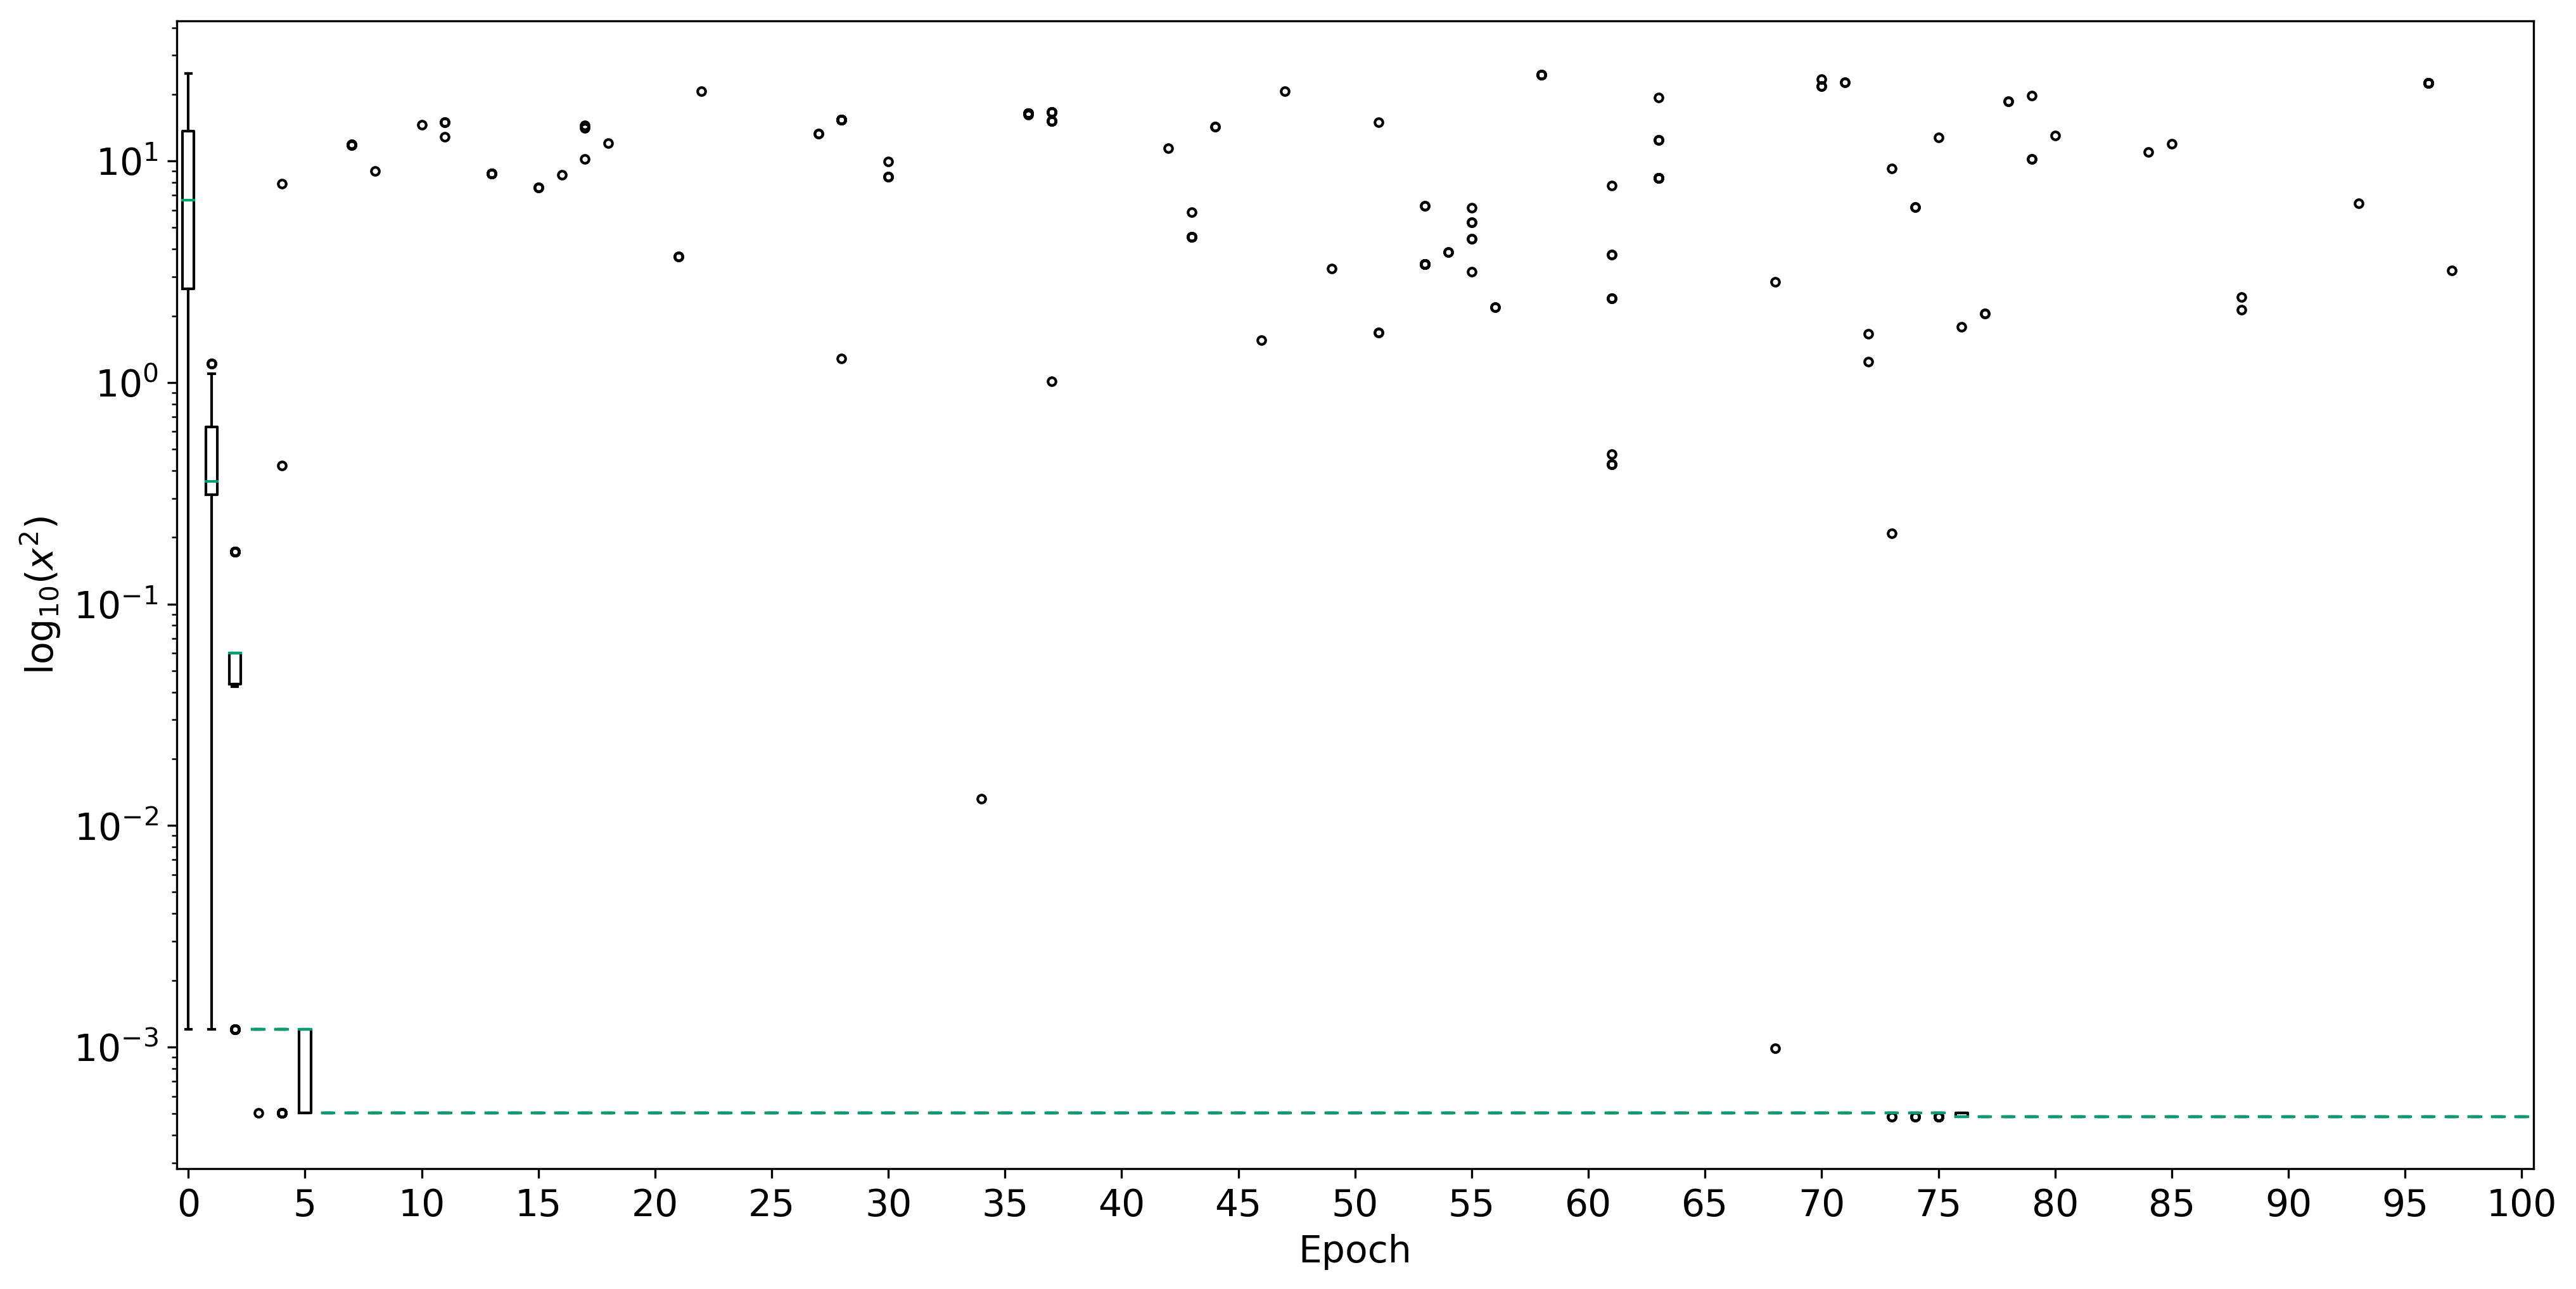

In [61]:
fig, ax = plt.subplots(1, figsize=(16, 8), dpi=300)
fontsize = 14

ax.boxplot(
    fit_history["fitness"].values.reshape(101, 100).T, sym="."
)

ax.set_yscale("log")
ax.set_xticks(range(1, 106, 5))
ax.set_xticklabels(range(0, 101, 5))

ax.set_xlabel("Epoch", fontsize=fontsize)
ax.set_ylabel(r"$\log_{10}\left(x^2\right)$", fontsize=fontsize)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(fontsize);

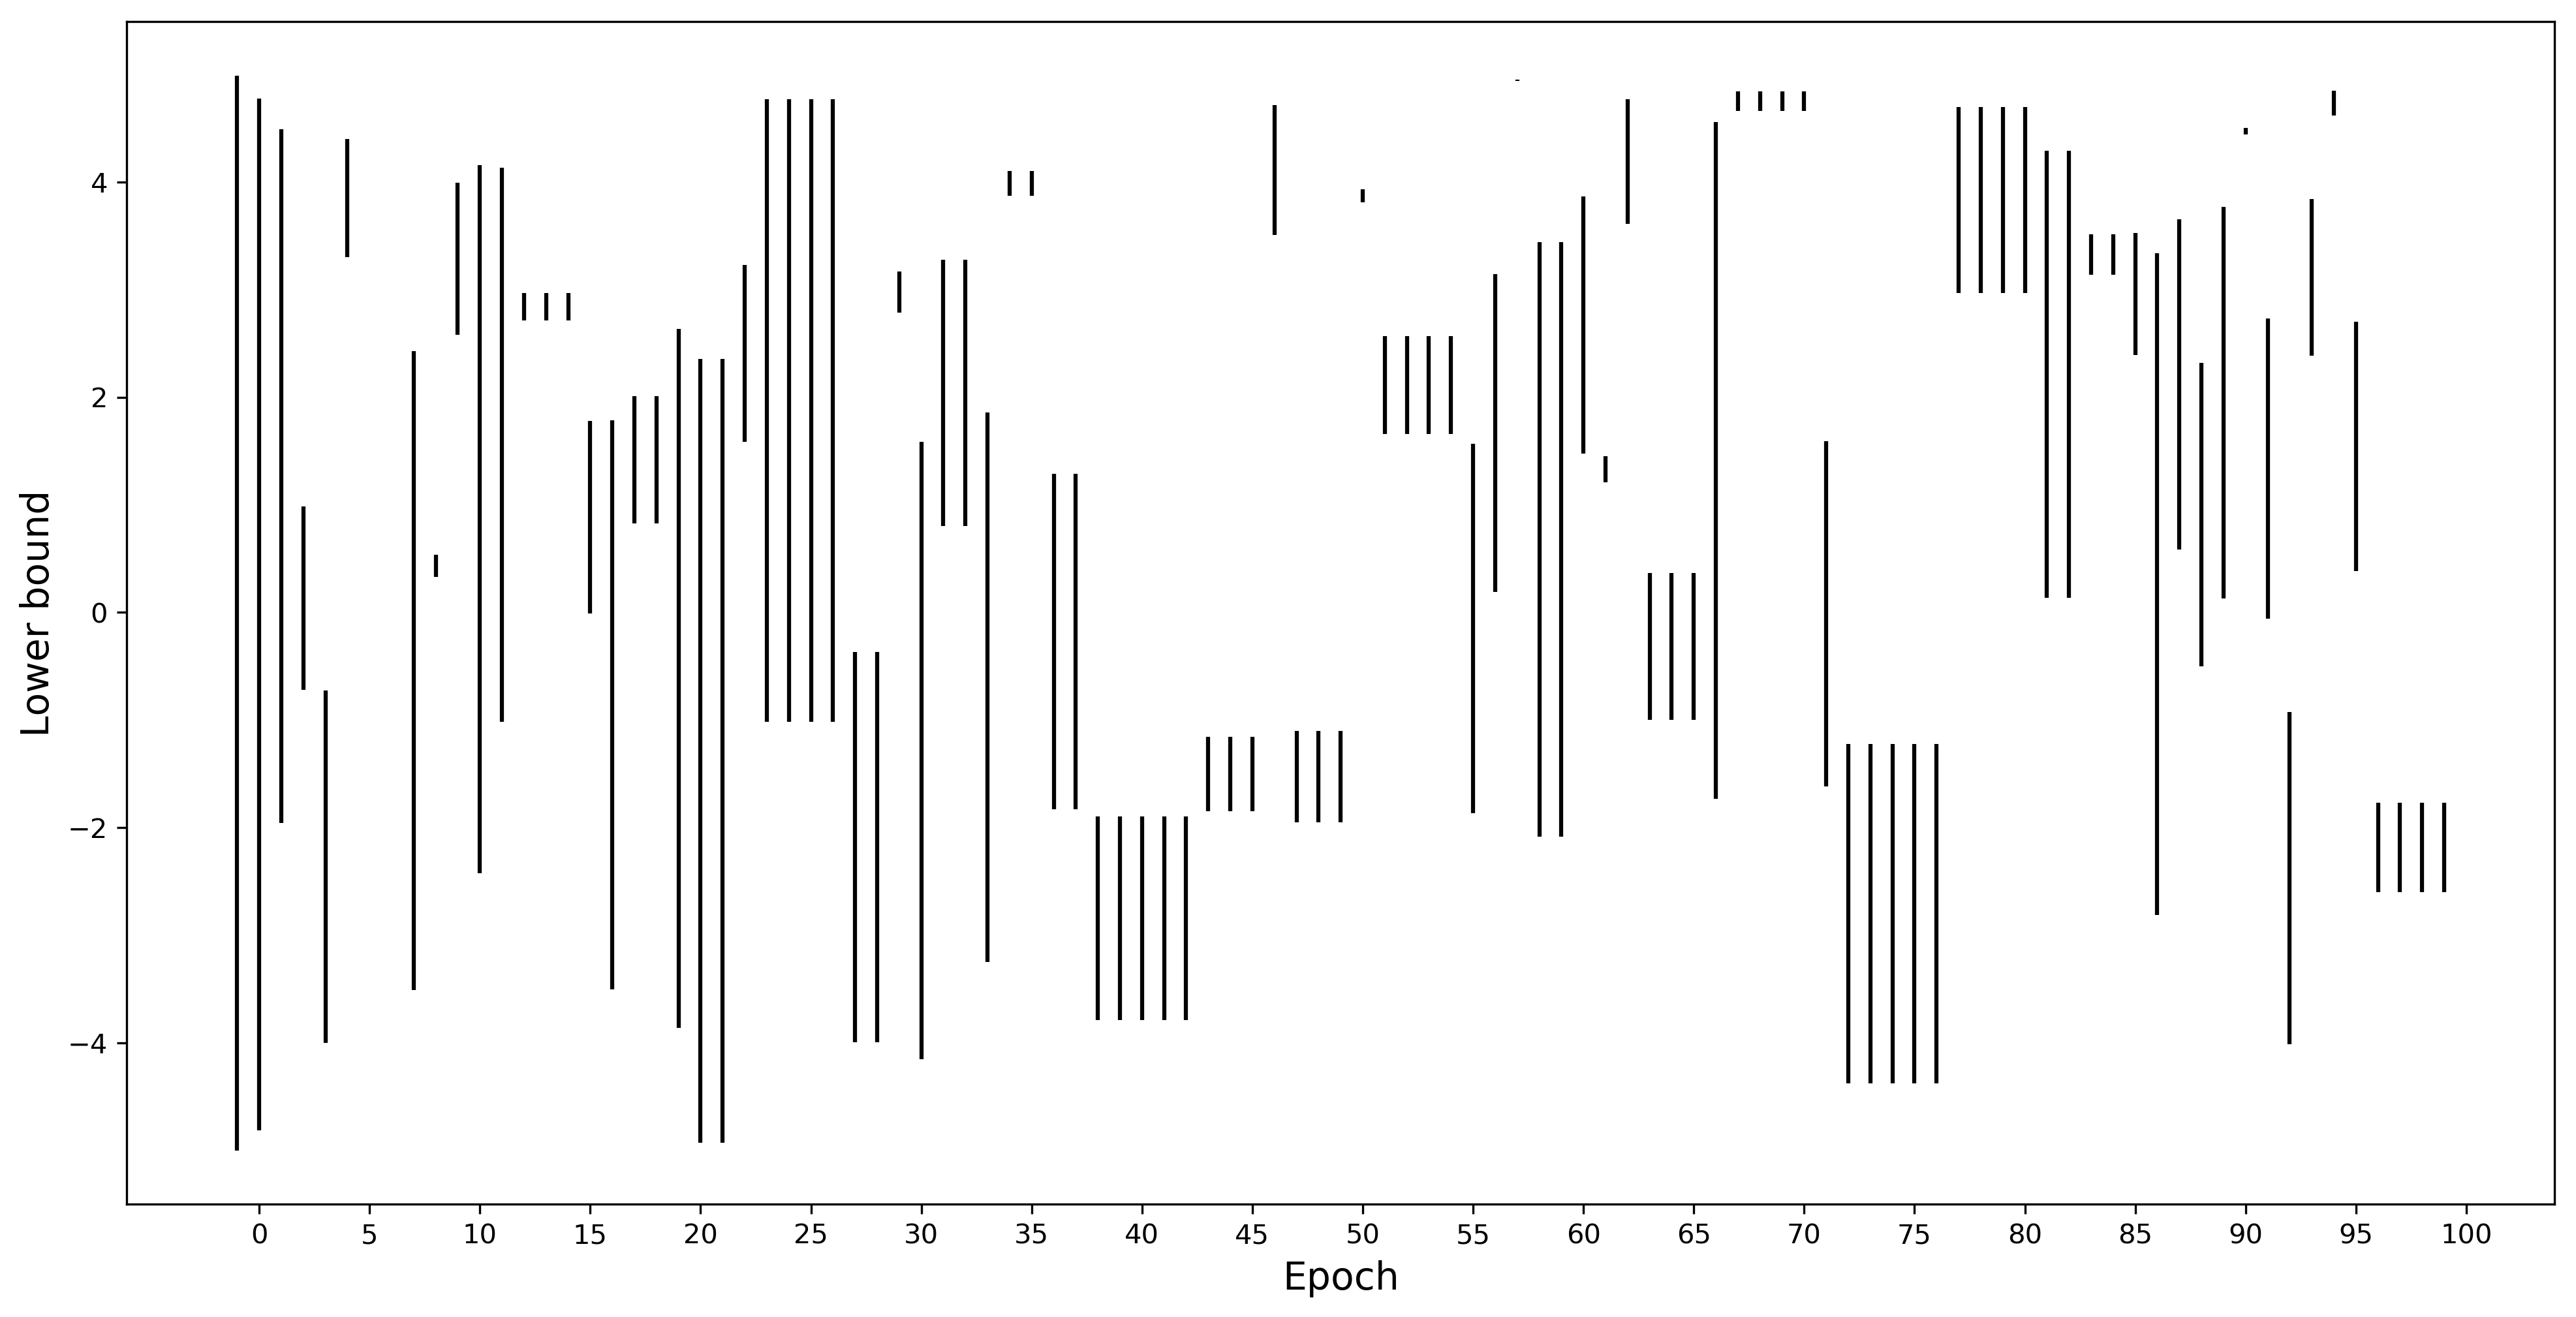

In [62]:
fig, ax = plt.subplots(1, figsize=(16, 8), dpi=300)

all_mins, all_maxs = [], []
for i, population in enumerate(pop_history):
    bounds = [meta[0]["bounds"] for _, meta in population]
    mins = [min(bound) for bound in bounds]
    maxs = [max(bound) for bound in bounds]
    all_mins.append(min(mins))
    all_maxs.append(max(maxs))

ax.vlines(range(len(all_bounds)), ymin=all_mins, ymax=all_maxs)

ax.set_xticks(range(1, 106, 5))
ax.set_xticklabels(range(0, 101, 5))

ax.set_xlabel("Epoch", fontsize=fontsize)
ax.set_ylabel("Lower bound", fontsize=fontsize);